In [ ]:
!nvidia-smi

Thu Jun 27 07:15:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 136MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 83.9MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 178.9ms
Speed: 13.3ms preprocess, 178.9ms inference, 817.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


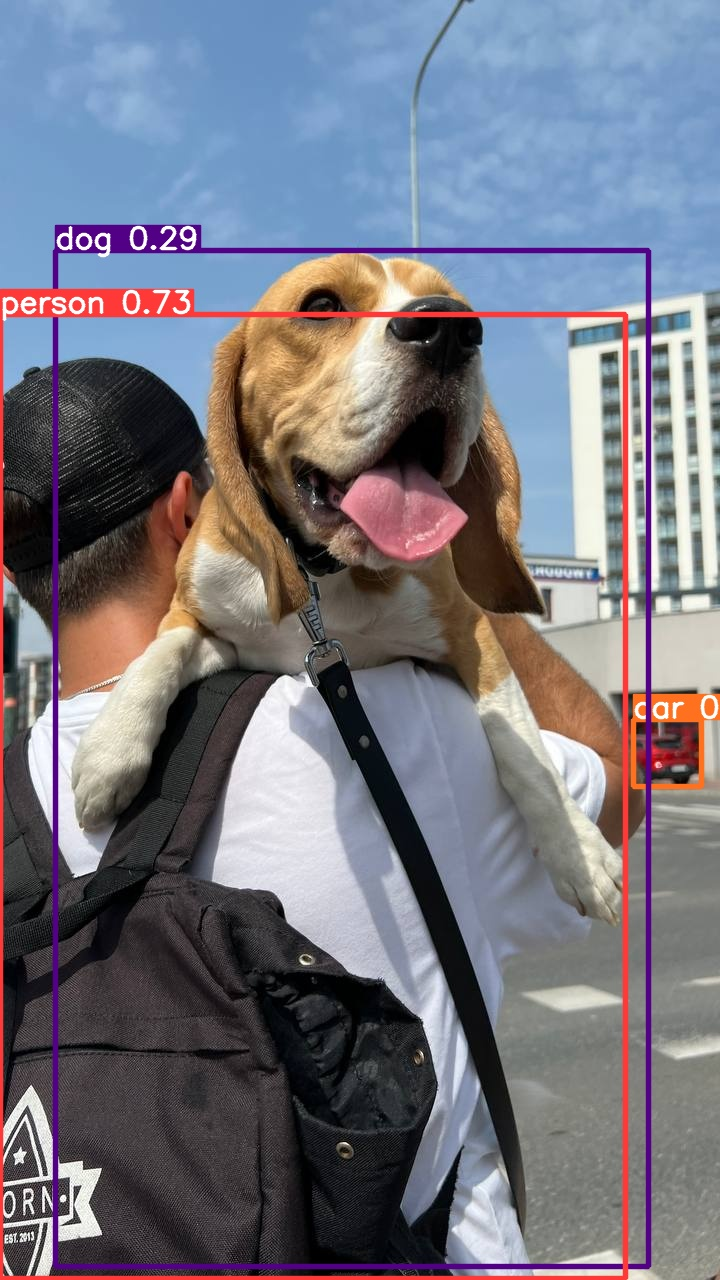

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

**Sesuaikan dengan database dari Roboflow**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="4OXeAPjDTAEs3Tcs226m")
project = rf.workspace("gustas").project("banana-peel-c1fyr")
version = project.version(4)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to banana-peel-4 in yolov8:: 100%|██████████| 2492/2492 [00:00<00:00, 5403.53it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=320 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 221MB/s]
New https://pypi.org/project/ultralytics/8.2.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/banana-peel-4/data.yaml, epochs=20, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_bu

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1719473357.6efddf49d1f3.4285.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch660.jpg	weights
P_curve.png					    train_batch661.jpg
PR_curve.png					    train_batch662.jpg


/content


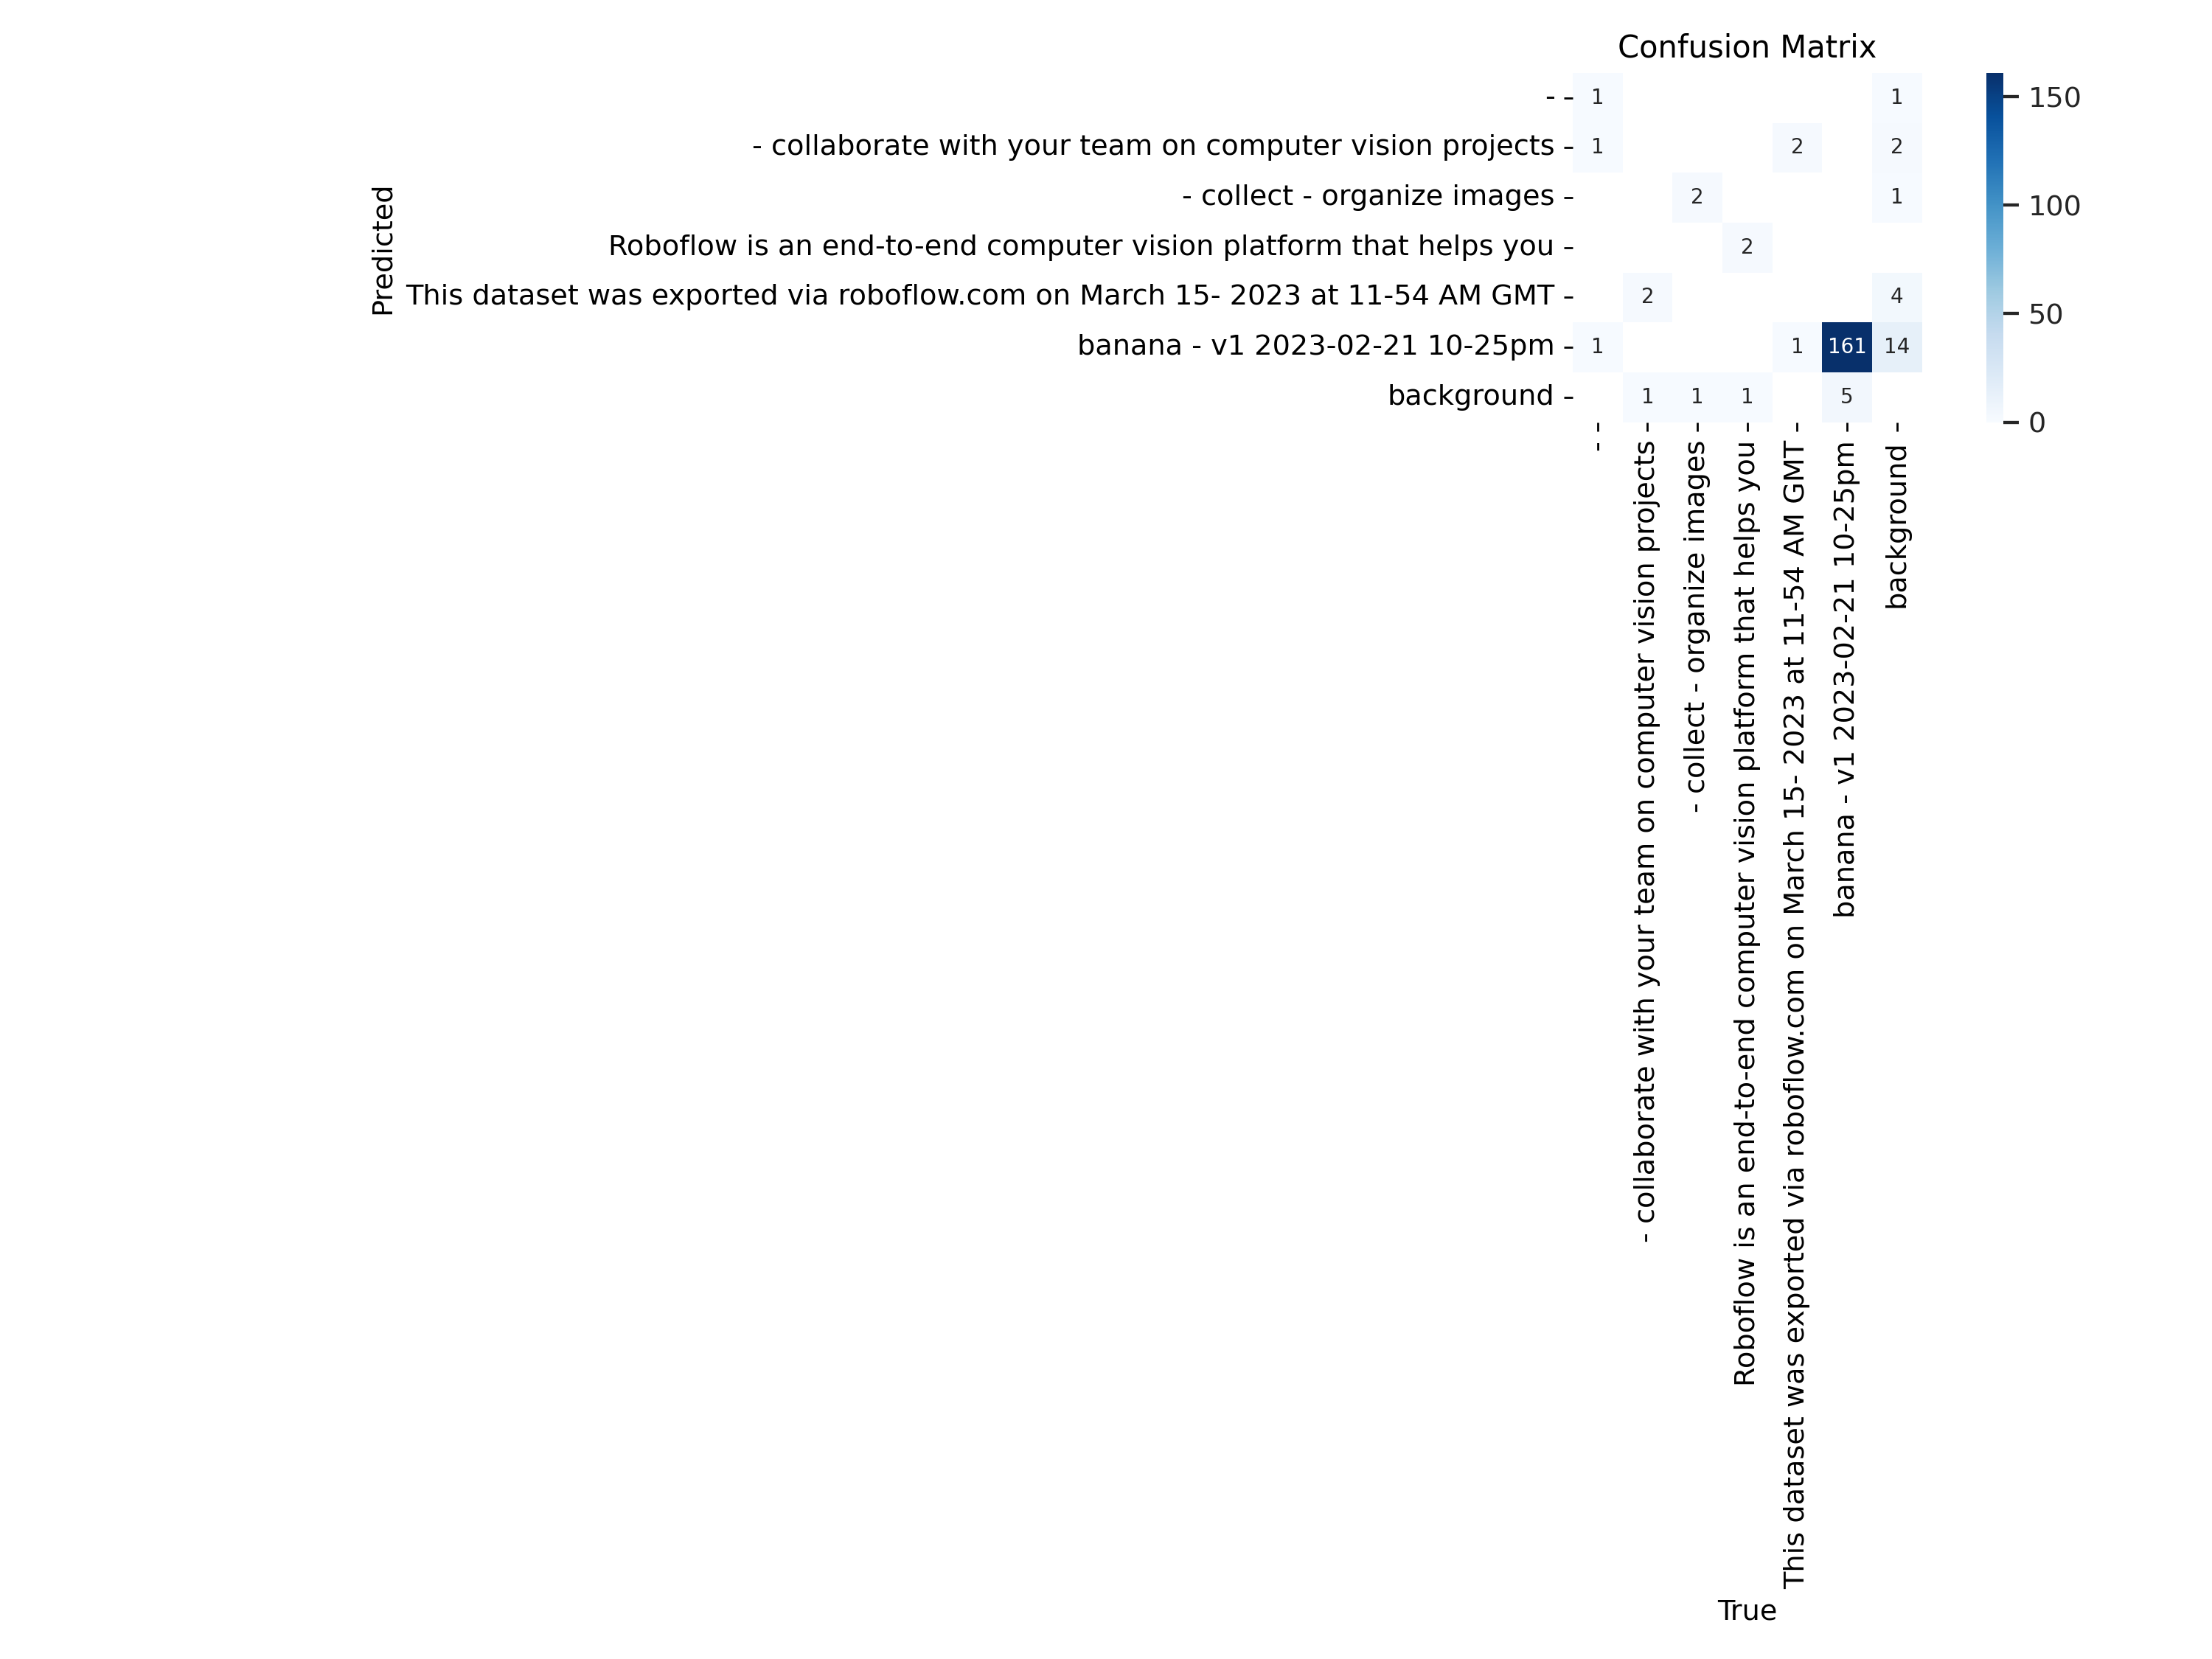

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


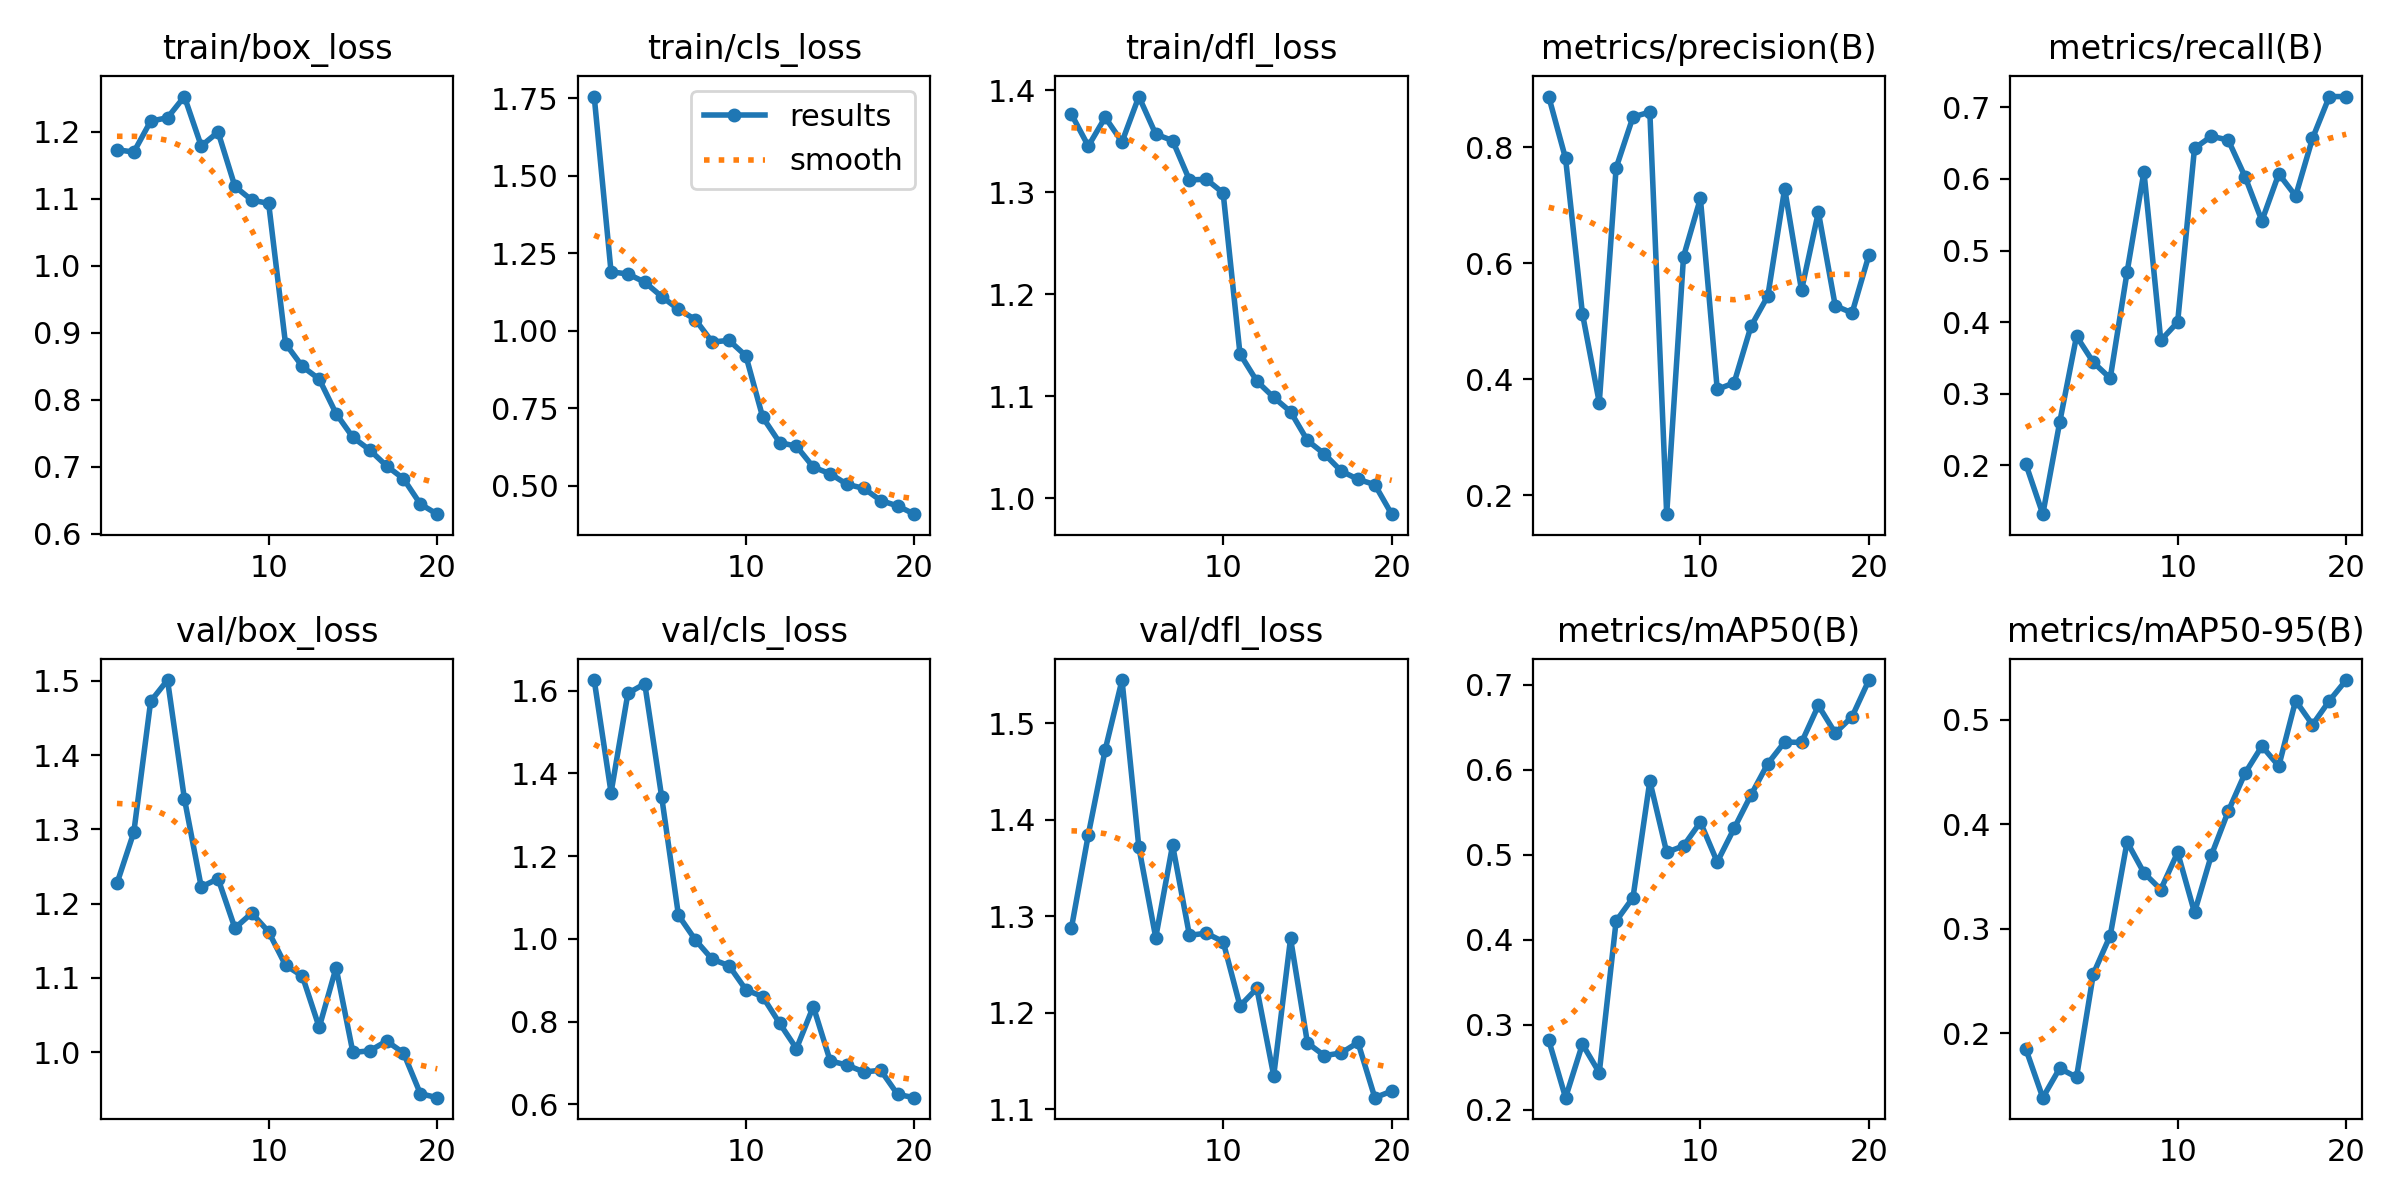

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


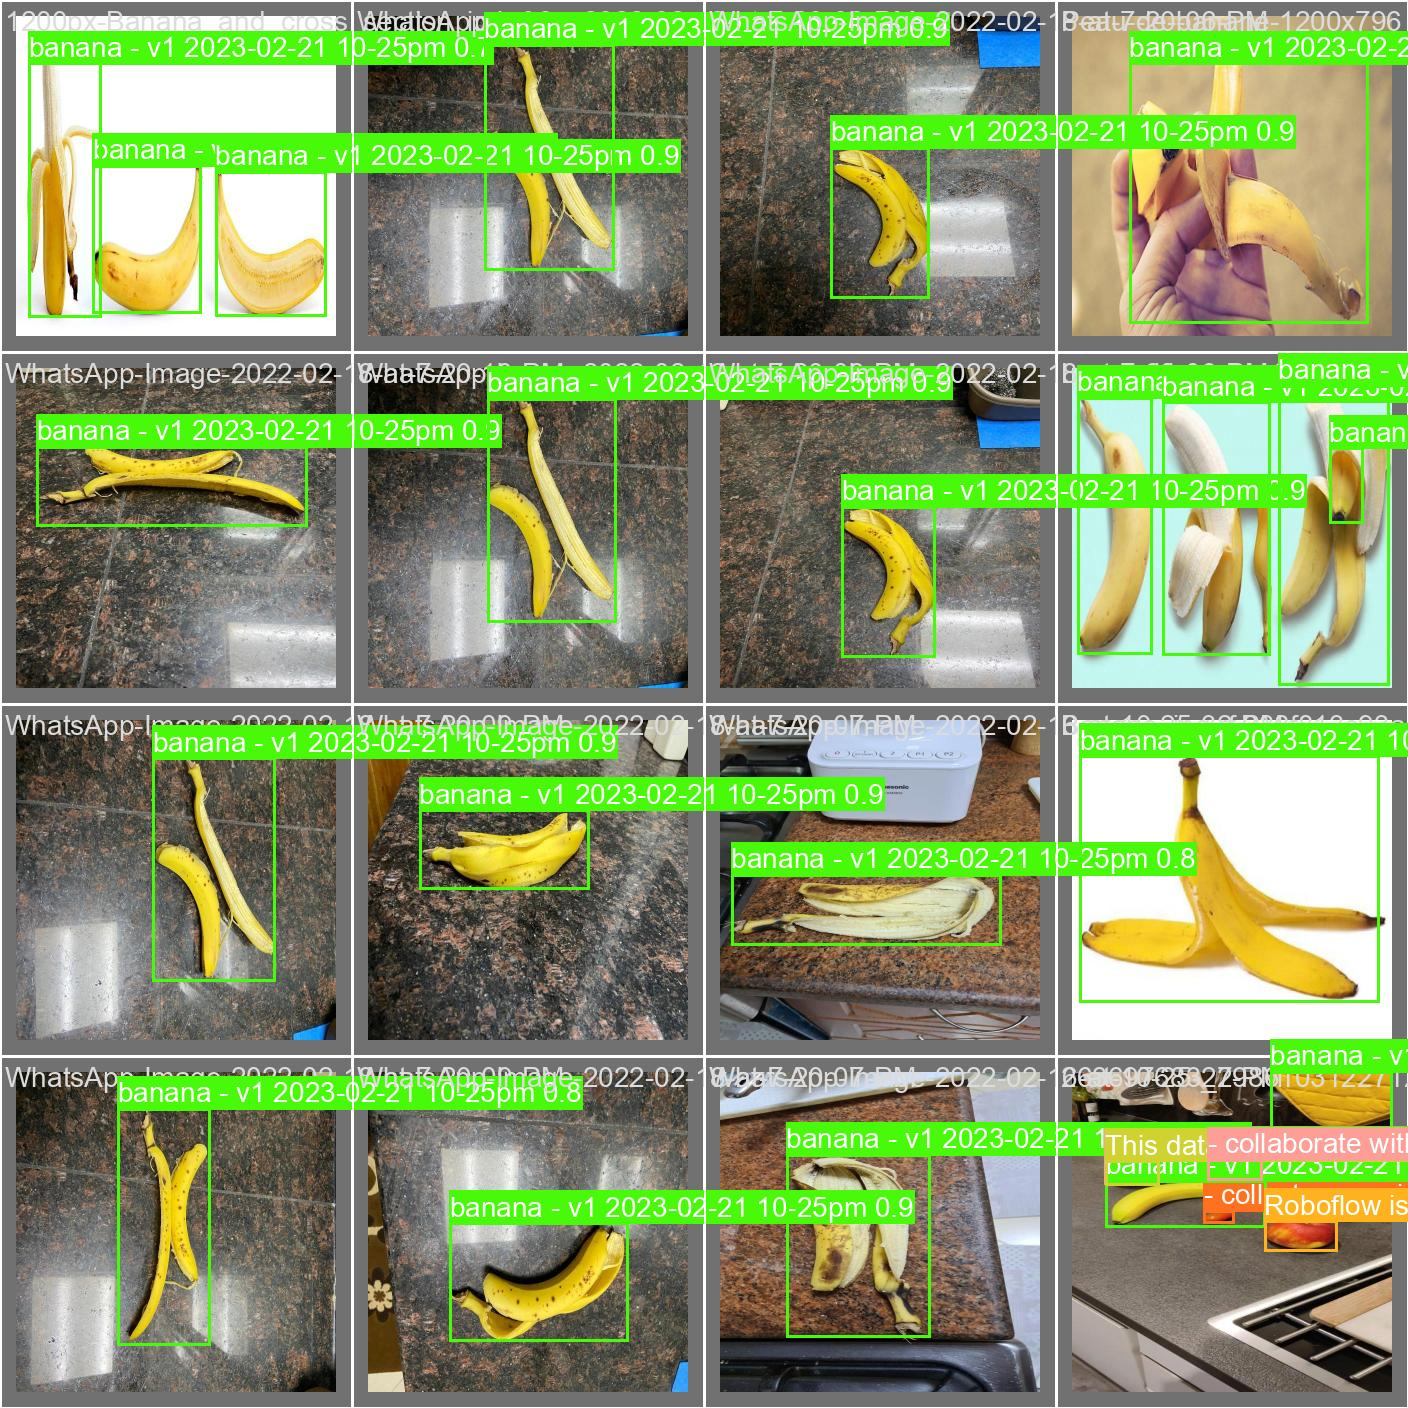

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/banana-peel-4/valid/labels.cache... 142 images, 0 backgrounds, 0 corrupt: 100% 142/142 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:04<00:00,  2.11it/s]
                   all        142        181      0.642      0.715      0.706      0.524
                     -        142          3      0.797      0.667      0.708      0.516
- collaborate with your team on computer vision projects        142          3      0.385      0.667      0.565      0.408
- collect - organize images        142          3      0.797      0.667      0.676      0.358
Roboflow is an end-to-end computer vision platform that helps you        142          3      0.673      0.667      0.676      0.508
This dataset was exported via robof

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/49 /content/datasets/banana-peel-4/test/images/20170304a_jpg.rf.ac267945a3527824261c2a86de520852.jpg: 320x320 1 banana - v1 2023-02-21 10-25pm, 21.7ms
image 2/49 /content/datasets/banana-peel-4/test/images/20211206_165056_jpg.rf.5101f5753702d9c6882543a4591ae381.jpg: 320x320 1 banana - v1 2023-02-21 10-25pm, 8.1ms
image 3/49 /content/datasets/banana-peel-4/test/images/20211206_165222_jpg.rf.00bcdf66f656e84d9d1368432385c7d9.jpg: 320x320 1 banana - v1 2023-02-21 10-25pm, 8.0ms
image 4/49 /content/datasets/banana-peel-4/test/images/20211206_220452_jpg.rf.63c698bf9beceb8714b214dc5471de98.jpg: 320x320 1 banana - v1 2023-02-21 10-25pm, 8.0ms
image 5/49 /content/datasets/banana-peel-4/test/images/20211206_220506_jpg.rf.02df600c7b4cd46a2c95d3d25cd3c83b.jpg: 320x320 1 ba

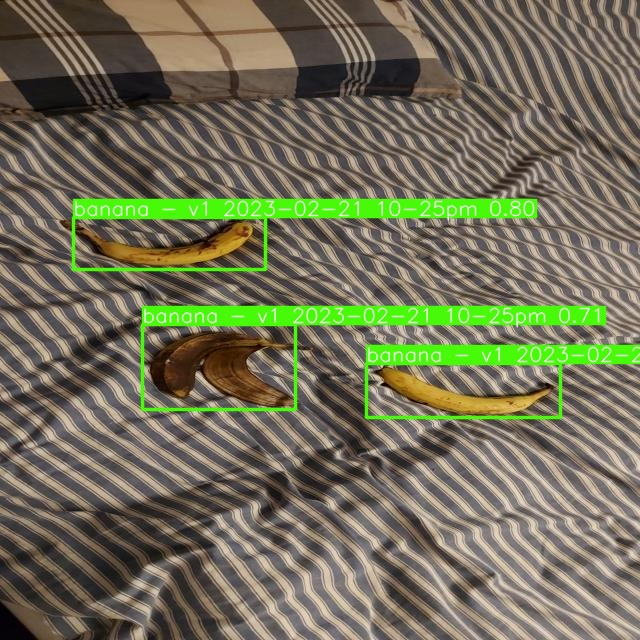

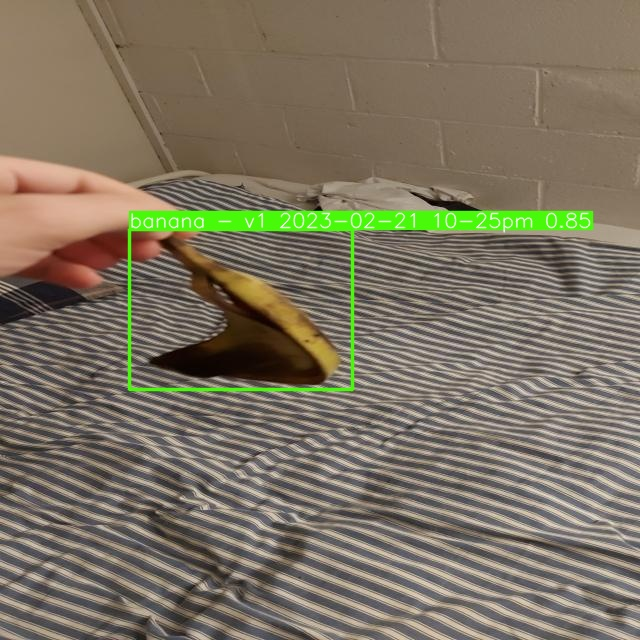

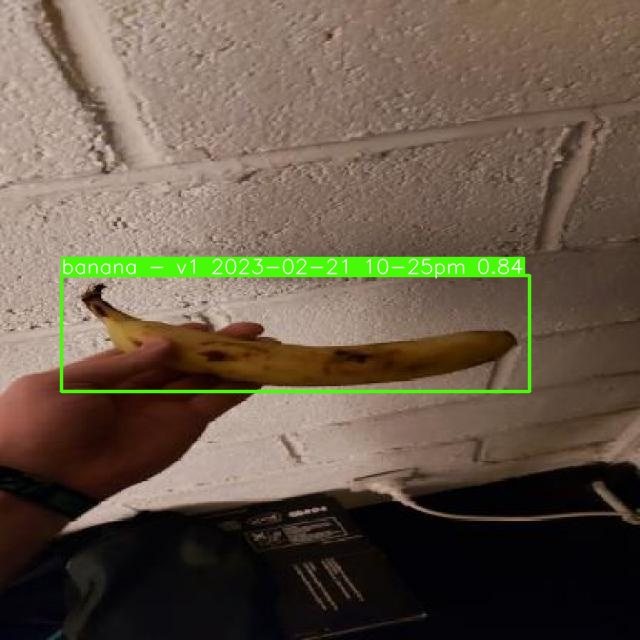

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp -av "/content/runs" "/content/drive/MyDrive/YoloApel2"

'/content/runs' -> '/content/drive/MyDrive/YoloApel2'
'/content/runs/detect' -> '/content/drive/MyDrive/YoloApel2/detect'
'/content/runs/detect/predict' -> '/content/drive/MyDrive/YoloApel2/detect/predict'
'/content/runs/detect/predict/dog.jpeg' -> '/content/drive/MyDrive/YoloApel2/detect/predict/dog.jpeg'
'/content/runs/detect/train' -> '/content/drive/MyDrive/YoloApel2/detect/train'
'/content/runs/detect/train/weights' -> '/content/drive/MyDrive/YoloApel2/detect/train/weights'
'/content/runs/detect/train/weights/last.pt' -> '/content/drive/MyDrive/YoloApel2/detect/train/weights/last.pt'
'/content/runs/detect/train/weights/best.pt' -> '/content/drive/MyDrive/YoloApel2/detect/train/weights/best.pt'
'/content/runs/detect/train/args.yaml' -> '/content/drive/MyDrive/YoloApel2/detect/train/args.yaml'
'/content/runs/detect/train/events.out.tfevents.1719473357.6efddf49d1f3.4285.0' -> '/content/drive/MyDrive/YoloApel2/detect/train/events.out.tfevents.1719473357.6efddf49d1f3.4285.0'
'/content/

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/YoloApel2/runs/detect/train/weights/best.pt", "/content")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/YoloApel2/runs/detect/train/weights/best.pt'

In [ ]:
!yolo export model=/content/best.pt format=tflite

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 564, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 149, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 855, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 781, in torch_safe_load
    ckpt = torch.load(fi

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image